<div style="border:solid green 2px; padding: 20px">
    
<b>Владимир, привет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

**Заказчик**

Отдел маркетинга Procrastinate Pro+



**Цель проекта**

На основе данных, предоставленных компанией, необходимо провести анализ и ответить на вопросы:
    

*    откуда приходят пользователи и какими устройствами они пользуются,
*    сколько стоит привлечение пользователей из различных рекламных каналов;
*    сколько денег приносит каждый клиент,
*    когда расходы на привлечение клиента окупаются,
*    какие факторы мешают привлечению клиентов.


**Входные данные**

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

*    лог сервера с данными об их посещениях (файл `visits_info_short.csv`)

 `User Id` — уникальный идентификатор пользователя,  
 `Region` — страна пользователя,  
 `Device` — тип устройства пользователя,   
 `Channel` — идентификатор источника перехода,  
 `Session Start` — дата и время начала сессии,  
 `Session End` — дата и время окончания сессии;  
 
 
*    выгрузка их покупок за этот период (файл `orders_info_short.csv`)    

 `User Id` — уникальный идентификатор пользователя,  
 `Event Dt` — дата и время покупки,  
 `Revenue` — сумма заказа;   
 
 
*    рекламные расходы (файл `costs_info_short.csv`)

 `Channel` — идентификатор рекламного источника,  
 `Dt` — дата проведения рекламной кампании,  
 `Costs` — расходы на эту кампанию.  
 
 
**Ход исследования**

Исследование пройдёт в четыре этапа:

*    Обзор  и предобработка данных;
*    Исследовательский анализ данных;
*    Анализ маркетинговых расходов;
*    Оценка окупаемости рекламы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). 
</div>

## Обзор данных


In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# чтение файлов с данными и сохранение в df

try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )


In [3]:
# обзор датафрейма visits

visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [4]:
# обзор датафрейма orders

orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [5]:
# обзор датафрейма costs

costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


**Выводы**

Мы ознакомились с таблицами. На первый взгляд, пропусков нет, но кое-что требует правки: тип данных в столбцах не всегда корректный (например, столбцы с датами имеют тип object). Так же нужно проверить данные на наличие дубликатов, привести наименования столбцов к единому стилю и сгуппировать данные для наглядности.

Переходимк предобработке данных.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

### Предобработка данных

In [6]:
# приведем наименования столбцов к единому стилю

visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = costs.columns.str.lower()

display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [7]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
# проверяем таблицы на наличие дубликатов

display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

### Знакомство с данными

#### `visits`

In [9]:
# определяем год и месяц начала сессии
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month

In [10]:
# находим количество сессий и количество пользователей
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'user_id': ['count', 'nunique']}
)

In [11]:
# переименовываем колонки
sessions_per_user.columns = ['n_sessions', 'n_users']

# делим число сессий на количество пользователей
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2019         5                   45765    27111           1.688060
             6                   44623    26042           1.713501
             7                   47970    26672           1.798515
             8                   55996    31064           1.802601
             9                   56628    31871           1.776788
             10                  58919    31175           1.889944

Мы видим, что количество уникальных пользователей растет в течение исследуемого периода, как и количество сессий. Но нельзя сказать, что две сессии в месяц  в среднем на каждого уникального пользователя - это много для развлекательного приложения.

Посмотрим на среднюю продолжительность сессии (ASL).

Среднее значение, секунды: 1800.0908677287264
Медианное значение, секунды: 1244.0


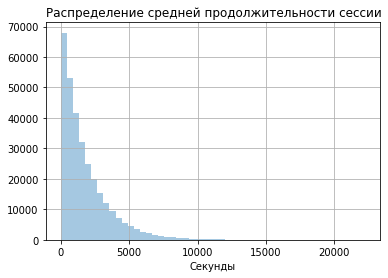

In [12]:
# считаем ASL

visits['session_duration_sec'] = (
    visits['session_end'] - visits['session_start']
).dt.seconds

print(f'Среднее значение, секунды: {visits.session_duration_sec.mean()}')
print(f'Медианное значение, секунды: {visits.session_duration_sec.median()}')


# строим гистограмму
visits['session_duration_sec'].hist(bins=50, alpha=0.4)
plt.title('Распределение средней продолжительности сессии', loc='left')
plt.xlabel('Секунды')
plt.show()

#### `orders`

In [13]:
orders.revenue.unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

Как мы видим, речь идет о пяти продуктах с фиксированной ценой.

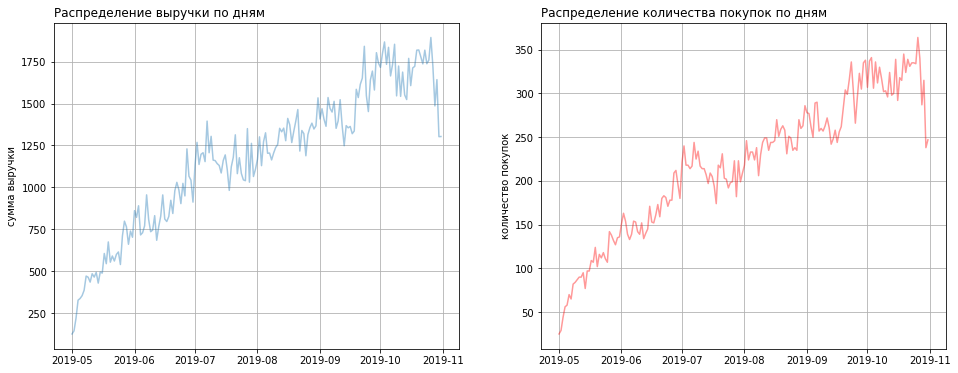

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(
    orders.pivot_table(
        index=orders.event_dt.astype('datetime64[D]'),
        values='revenue',
        aggfunc='sum'
    ), alpha=0.4
)
ax1.grid(True)
ax1.set_title('Распределение выручки по дням',  loc='left')
ax1.set_ylabel('сумма выручки')

ax2.plot(
    orders.pivot_table(
        index=orders.event_dt.astype('datetime64[D]'),
        values='revenue',
        aggfunc='count'),
    color='r', 
    alpha=0.4
)

ax2.grid(True)
ax2.set_title('Распределение количества покупок по дням',  loc='left')
ax2.set_ylabel('количество покупок')
plt.show()

#### `costs`

Посмотрим на маркетинговые затраты в разрезе каналов привлечения за исследуемый период:

In [15]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Мы видим, что компания не скупится на маркетинговые расходы, имеется несколько каналов привлечения пользователей. Основные затраты идут на рекламу в TipTop и FaceBoom.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
Хорошо, основные действия по предобработке сделаны, здорово, что ты не забыли проверить данные на наличие дубликатов.
</div>

## Исследовательский анализ данных

Создадим пользовательский профиль посетителей приложения. Для этого используем функцию `get_profile` и передадим есть данные о посещениях, покупках и тратах на рекламу.

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Лучше все необходимые функции выгрузить в один раздел
</div>

In [17]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [18]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

In [19]:
print('Минимальная дата привлечения клиентов:',min_analysis_date)
print('Максимальная дата привлечения клиентов:',max_analysis_date)

Минимальная дата привлечения клиентов: 2019-05-01
Максимальная дата привлечения клиентов: 2019-10-27


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так. В данном шаге мы сравниваем исходные даты из `таблицы профилей` с датами ТЗ заказчика. Горизонт и момент анализа мы используем только в 5 разделе, ведь именно там мы смотрим окупаемость за 2 недели
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Отсутствует вывод, иначе не совсем понятно, зачем мы смотрели на эти даты (например, соответствую ли даты ТЗ или нет).
</div>

### Страны

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны и визуализируем ее.

In [20]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

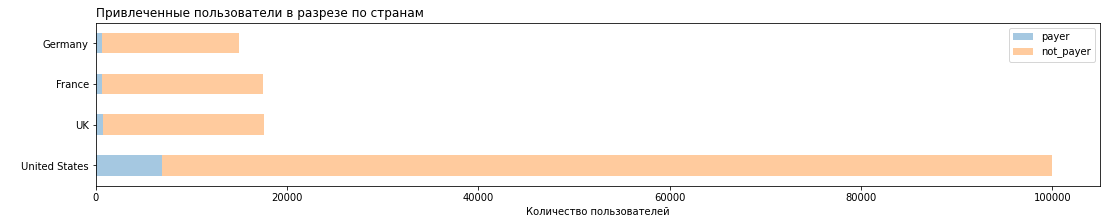

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [21]:
fig, ax = plt.subplots(figsize=(18, 3))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе по странам',loc='left')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

Мы видим, что подавляющее большинство привлеченных пользователей - из США. Эта же страна лидирует и по количеству платящих пользователей. Франция и Великобритания очень похожи по показателям, а в отстающих - Германия (но при этом по доле платящих пользователей она на втором месте).

### Устройства

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства и визуализируем ее.

In [22]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

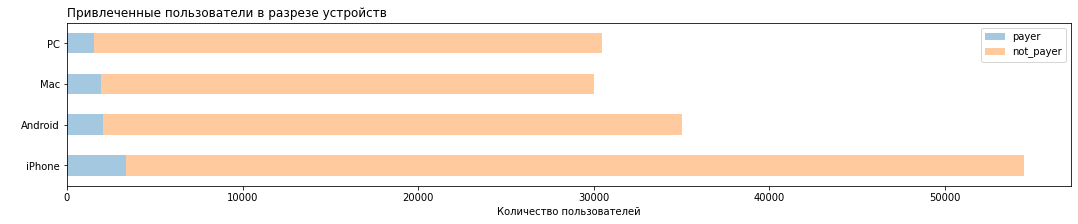

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


In [23]:
fig, ax = plt.subplots(figsize=(18, 3))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе устройств',loc='left')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

Клиенты (с покупками, так и без) предпочитают iOS.

### Каналы привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения и визуализируем ее.

In [24]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

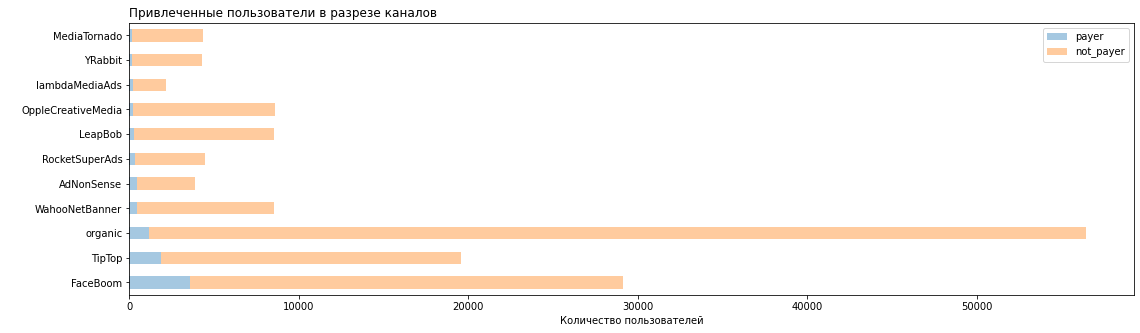

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
organic,55279,1160,2.06
WahooNetBanner,8100,453,5.30
AdNonSense,3440,440,11.34
RocketSuperAds,4096,352,7.91
LeapBob,8291,262,3.06
OppleCreativeMedia,8372,233,2.71
lambdaMediaAds,1924,225,10.47


In [25]:
fig, ax = plt.subplots(figsize=(18, 5))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе каналов',loc='left')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel

Больше всего пользуются приложением органические пользователи, правда их доля конверсии очень низкая.
Два самых больших канала - TipTop и FaceBoom показывают неплохие результаты. Так же, хороших поток привлеченных платящих пользователей показывает AdNonSense.

- Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения;
- Определили основной рынок: больше всего приходит пользователей из США, и они лучше других конвертируется;
- При этом большая часть пользователей заходит с мобильных устройств;
- Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


В целом в данном разделе был проведен хороший анализ данных - мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения, определили основной рынок. Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

## Маркетинг

Мы уже немного анализировали таблицу `costs` и выяснили, что приложение много вкладывает в рекламу на TipTop И FaceBoom.

In [26]:
print(f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}')

Общая сумма затрат на рекламу: 105497.0


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

        
Здорово, что округлил

In [27]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Тут можно подсчитать доли затрат по каналам - так нагляднее видно, что основная часть бюджета ушла на два канала.

Посмотрим, как распределяются затраты на рекламу по дням.

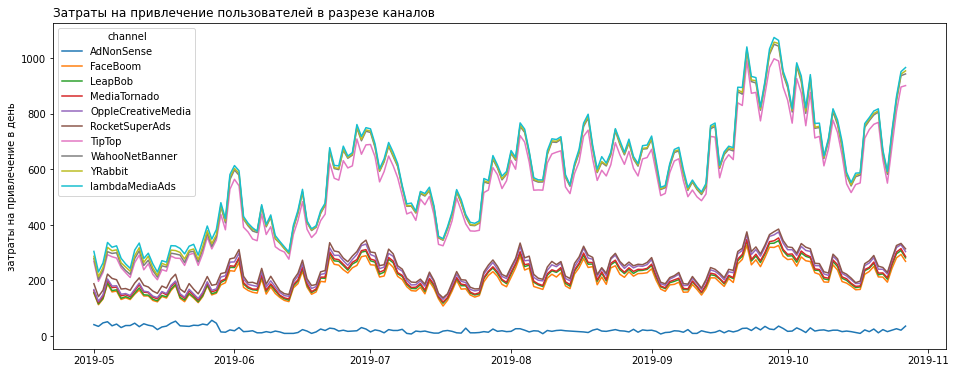

In [28]:
# построим график ежедневных затрат по каналам

fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index=costs.dt,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Затраты на привлечение пользователей в разрезе каналов', loc='left')
ax.set_ylabel('затраты на привлечение в день')
ax.set_xlabel(' ')
plt.show()

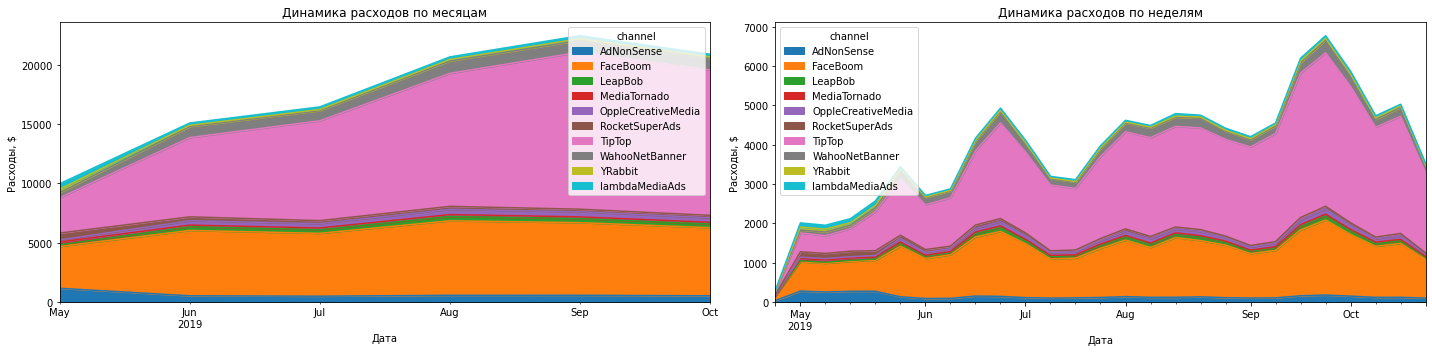

In [29]:
costs['month'] = costs['dt'].astype('datetime64[M]')  # создаем столбец с датой в формате месяцев
costs['week'] = costs['dt'].astype('datetime64[W]')  # создаем столбец с датой в формате недель
columns = ['month', 'week']
titles = ["Динамика расходов по месяцам", "Динамика расходов по неделям"]

plt.subplots(figsize=(20, 5))

for i, col in enumerate(columns):
    ax = plt.subplot(1, 2, i + 1)
    costs.pivot_table(index=col, columns='channel', values='costs', aggfunc='sum').plot.area(ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Дата')
    ax.set_ylabel('Расходы, $')
  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по одному из пунктов задания (из брифа) - визуализировать динамику расходов по каналам.
    
По  месяцам (с помощью метода `df[''].astype('datetime64[M]')` привести к месячной дате.). Добавишь, пожалуйста?
    
---
    
А с помощью `[W]` - недельной
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил динамику расходов по месяцам и неделям. Особо отчетливо мы можем увидеть рост расходов по месяцам и пики трат в ближе к концу месяца.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

Мы видим динамику роста трат.


Рассчитаем средний CAC на одного пользователя для всего проекта, используя профили пользователей, но без канала Organic, т.к. этот канал привлечения приложению ничего не стоит.

In [30]:
cac_person = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_person

acquisition_cost    1.127481
dtype: float64

и для каждого источника трафика.

In [31]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Как вы видим, дороже всего приложению обходится пользователь, которого привлекли просредством TipTop.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
    
</div>

##  Оценка окупаемости рекламы

### Общая окупаемость

Для начала оценим общую картину - рассмотрим общую окупаемость рекламы. Для этого построим графики LTV и ROI, а также графики динамики LTV, CAC и ROIс использованием функций get_ltv для расчетов и plot_ltv_roi - для визуализации, а так же def filter_data для сглаживания графиков.

In [32]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


In [33]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [34]:
profiles = profiles.query('channel != "organic"') #исключаем из таблицы органических пользователей.
observation_date = datetime(2019, 11, 1).date()  # задаём момент анализа 
analysis_horizon = 14  #задаём горизонт анализа 

Так как мы приступаем к анализу окупаемости, исключаем из скоупа данных всех органических пользователей: они приносят доход, но  их привлечение компании ничего не стоило.

In [35]:
profiles = profiles.query('channel != "organic"')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Совершенно верно, поскольку мы за них ничего не платим,  а нам нужно изучить именно окупаемость рекламы. 
</div>

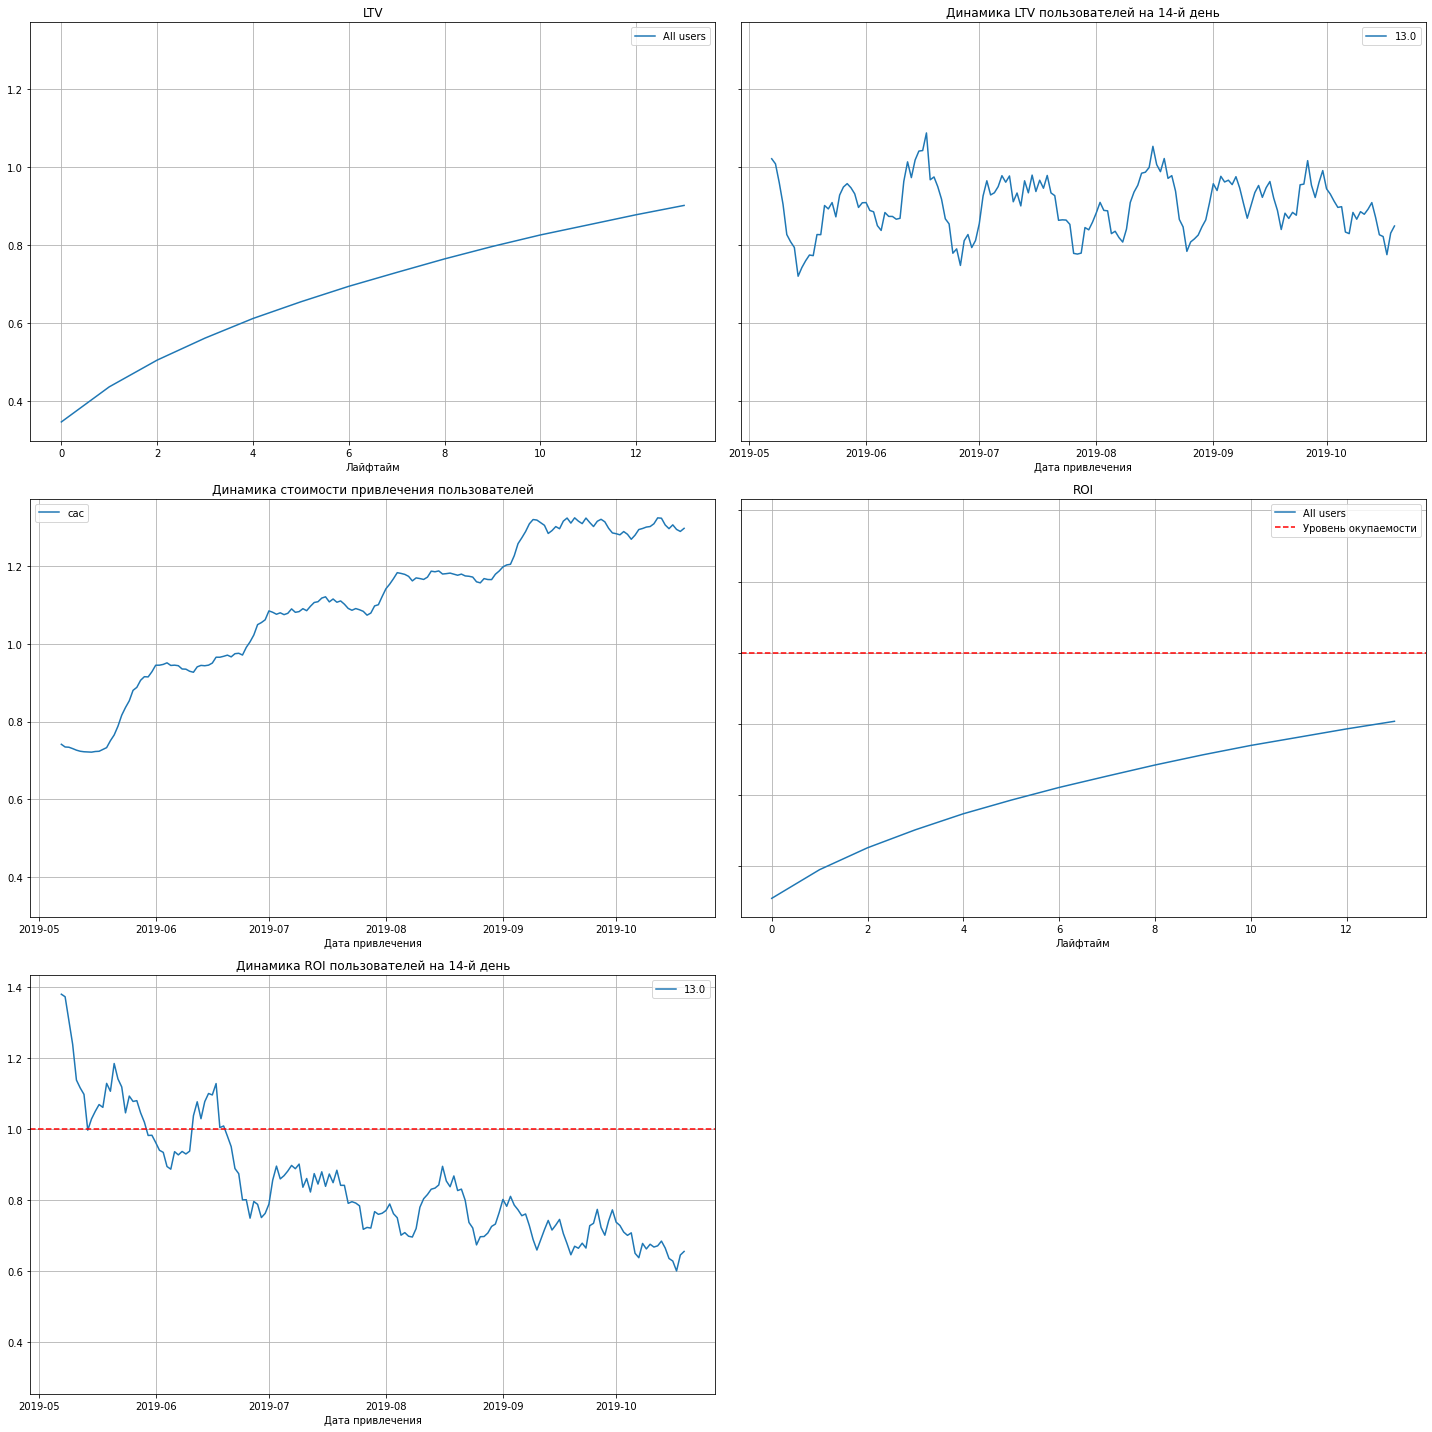

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Какие выводы можно сделать по этим графикам:

* реклама к 14-му дню и далее не окупается;   
* САС растет, значит рекламный бюджет увеличивается;   
* начиная с  июня что-то идет не так: привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Логика анализа верная, согласен с выводом. Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.
</div>


### Окупаемость рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим те же графики (LTV и ROI, а также графики динамики LTV, CAC и ROI).

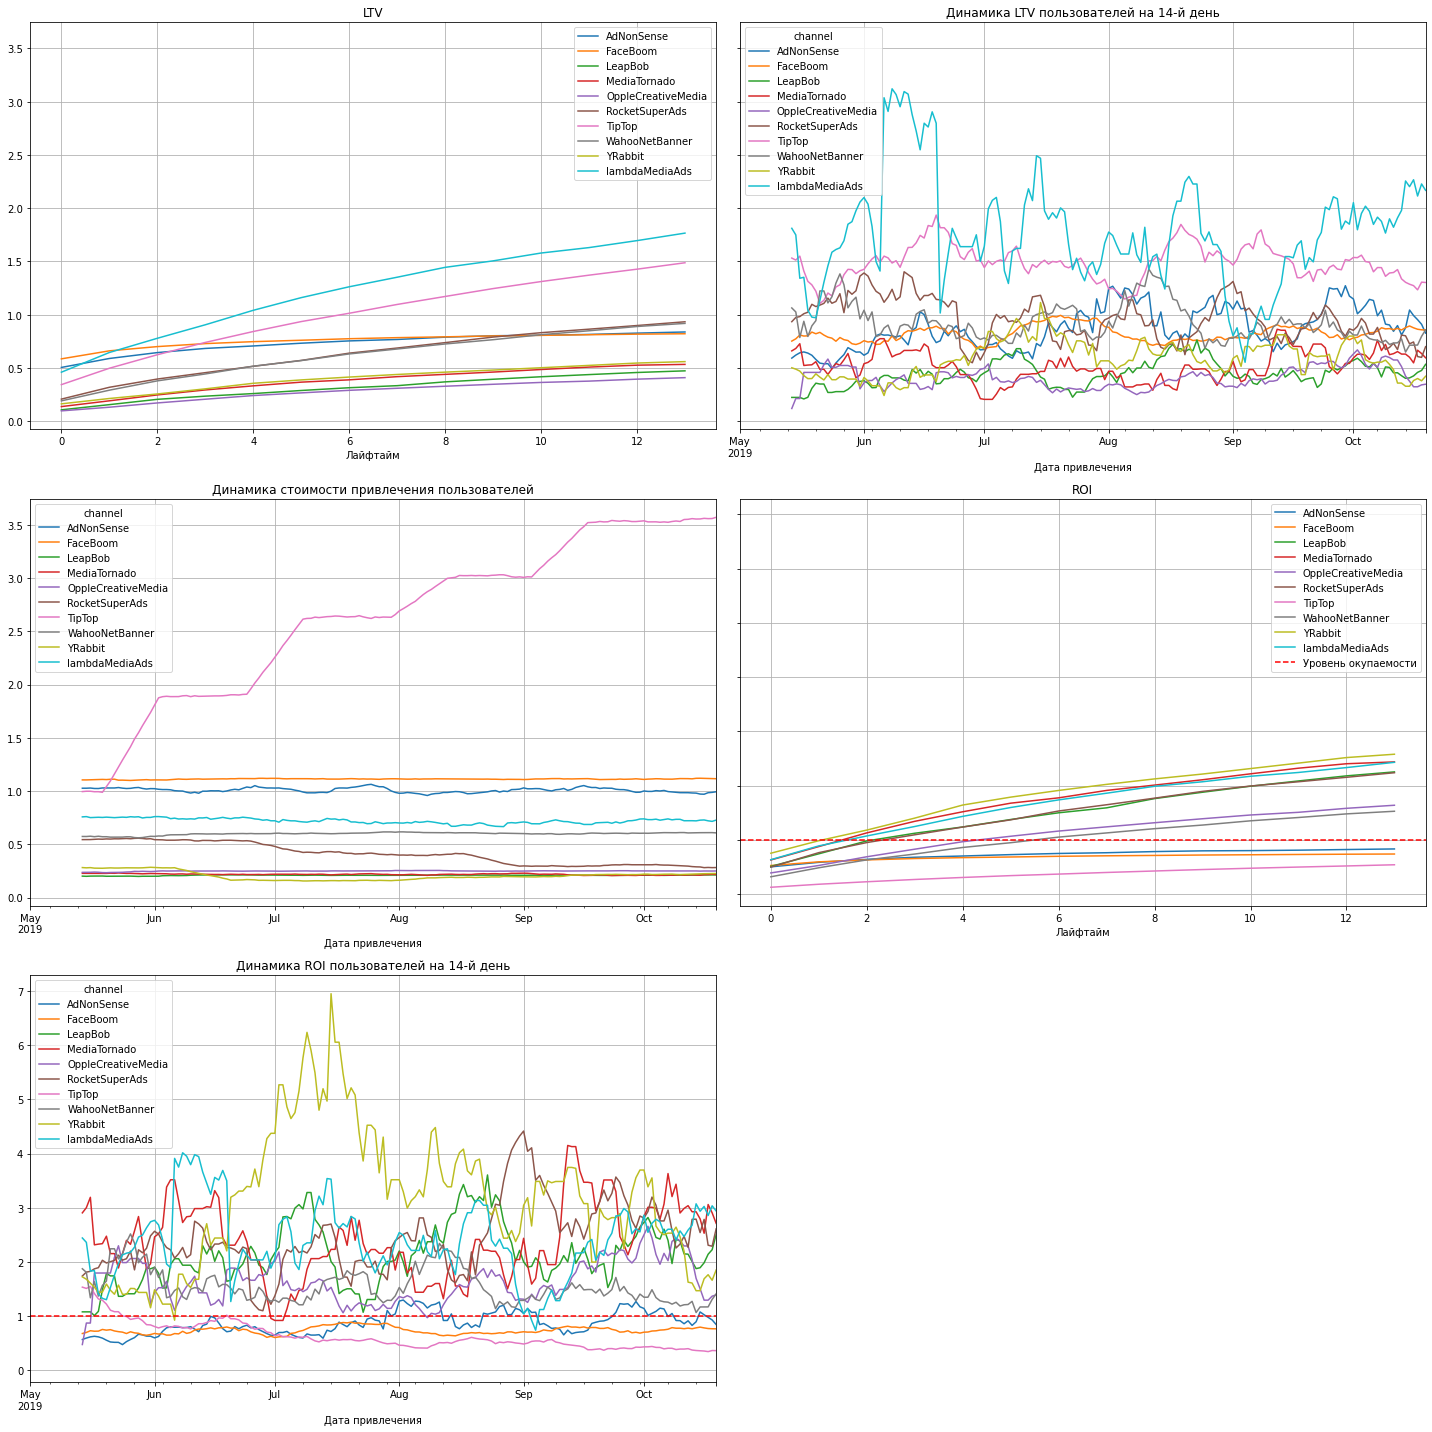

In [37]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)


LTV у всех пользователей имеет положительную динамику, несмотря на канал привлечения. Наибольшую ценность представляют пользователи, привлеченные с lambdaMediaAds и TipTop. Опять же САС зашкаливает у пользователей с TipTop, и как следствие, на графике ROI, мы видим отсутствие окупаемости у данной категории пользователей. А вот окупаемость пользователей, привлечённых с других каналов, во многом показывает высокую рентабельность, стоит обратить на них внимание! В первую очередь, это:  YRabbit, lambdaMediaAds, MediaTornado. TipTop, AdNoneSense и FaceBoom тут, безусловно, в аутсайдерах: судя по графику динамики ROI, они не выходили в плюс за весь анализируемый период.

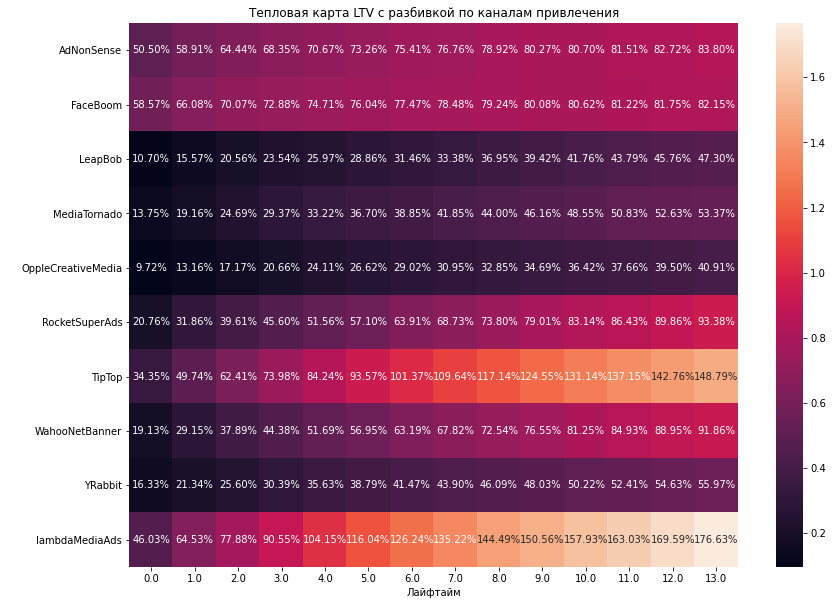

In [38]:
# Heatmap LTV
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()


По этим графикам хороших новостей мало:

* На двухнедельном лайфтайме затраты на первую тройку компаний (на которые тратится практически весь рекламный бюджет) - не окупаются,

* Затраты на рекламу в TipTop и FaceBoom вообще не окупаются,

* С затратами на рекламу TipTop увеличиваются каждый месяц,

* Перспективным каналом кажется lambdaMediaAds - низкая стоимость привлечения (0,72)и высокие показатели пожизненнаой ценности клиента.

Чтобы не быть голословными, посмотри графики только по каналам из топ 4 САС.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Да, действительно, есть проблемы с каналом TipTop, видим значительный рост затрат на привлечение.
</div>

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802


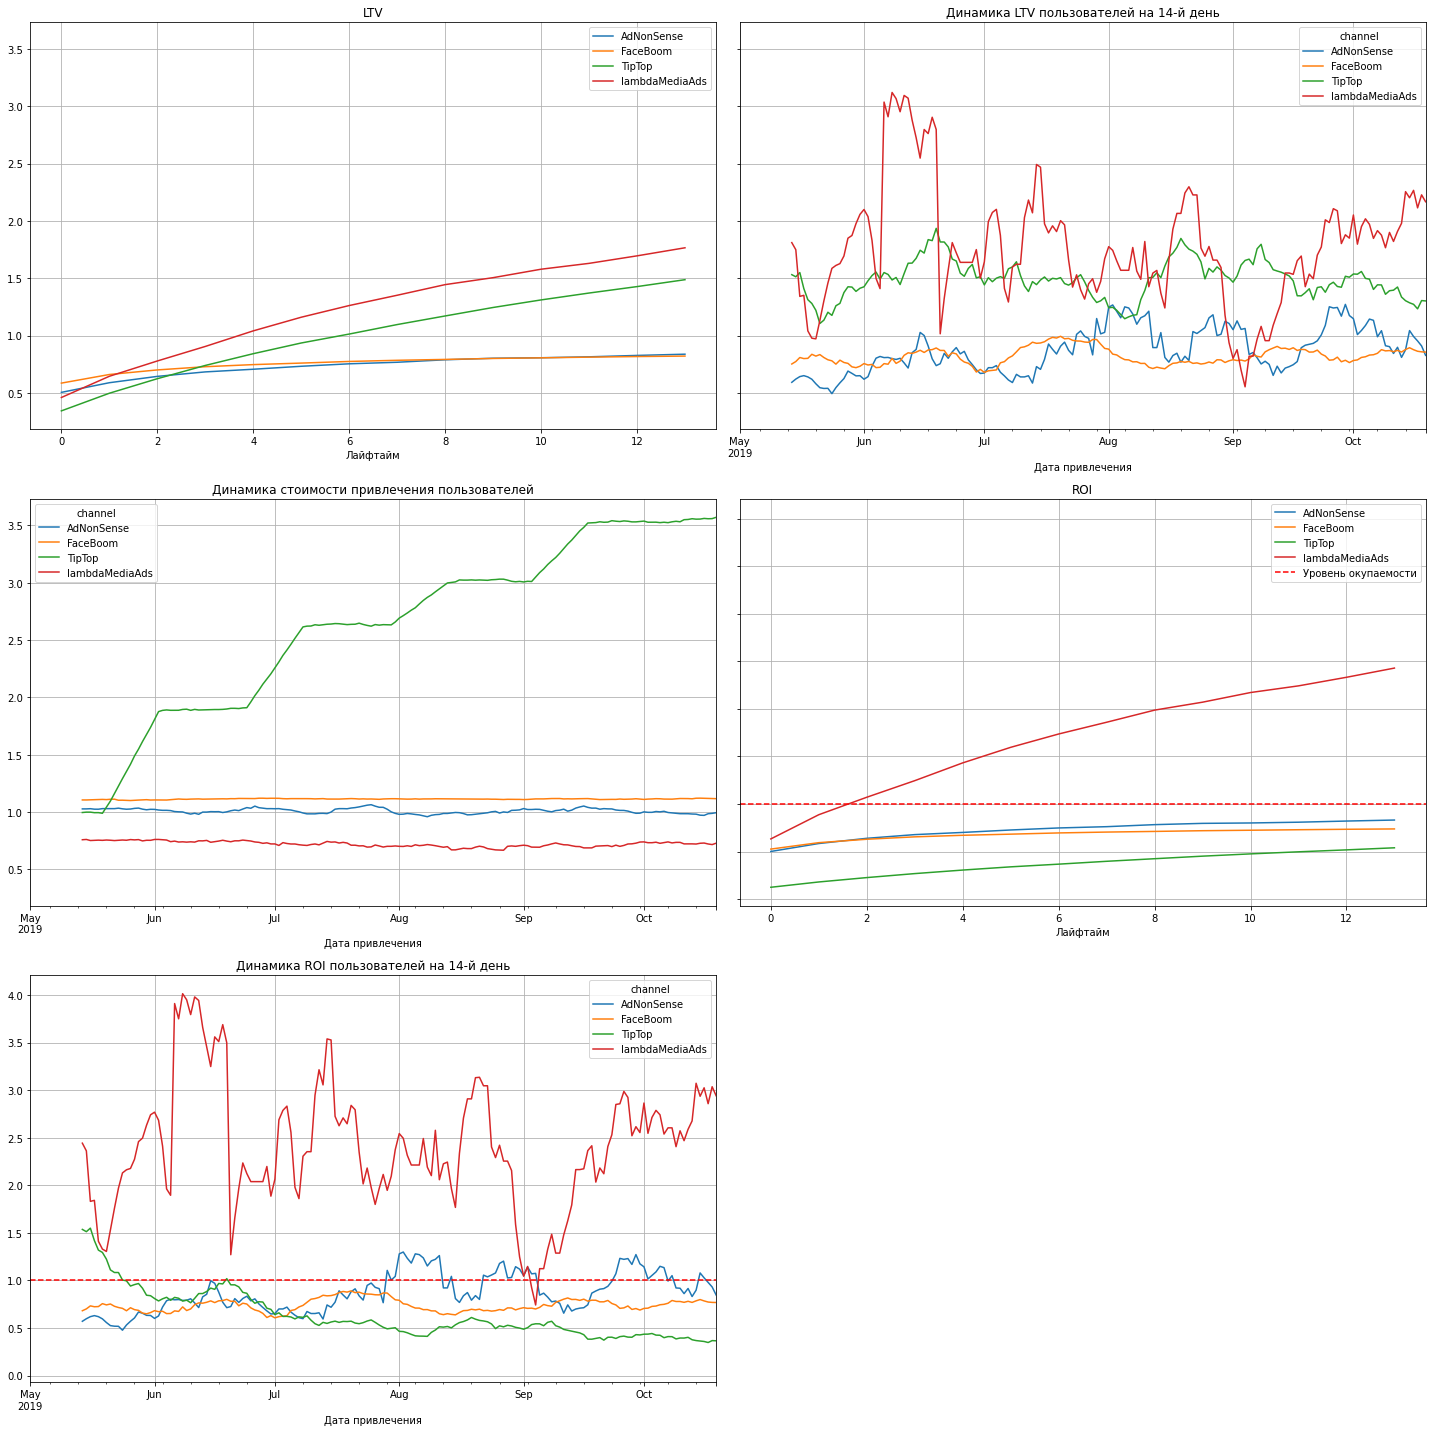

In [39]:
# считаем LTV и ROI
display(cac_channel.head(4))

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == ["TipTop", "FaceBoom", "lambdaMediaAds",  "AdNonSense"]'), orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Да, все так, как мы описали выше. И именно на это (кроме lambdaMediaAds) идут порядка 80-ти %% из рекламного бюджета.   

Давайте посмотрим, какие каналы за какие рагионы присутствия отвечают.

In [40]:
 (
     profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}')

Да, каналы привлечения имеют специализацию по странам. 

При этом каналы, работающие на европейскую публику одинаково представлены как в во Франции, так и в Великобритании с Германией.Этот факт можно и нужно учесть, при выборе замены, если это потребуется.

### Окупаемость рекламы с разбивкой по странам

Приступим к анализу окупаемости рекламы с разбивкой по странам.

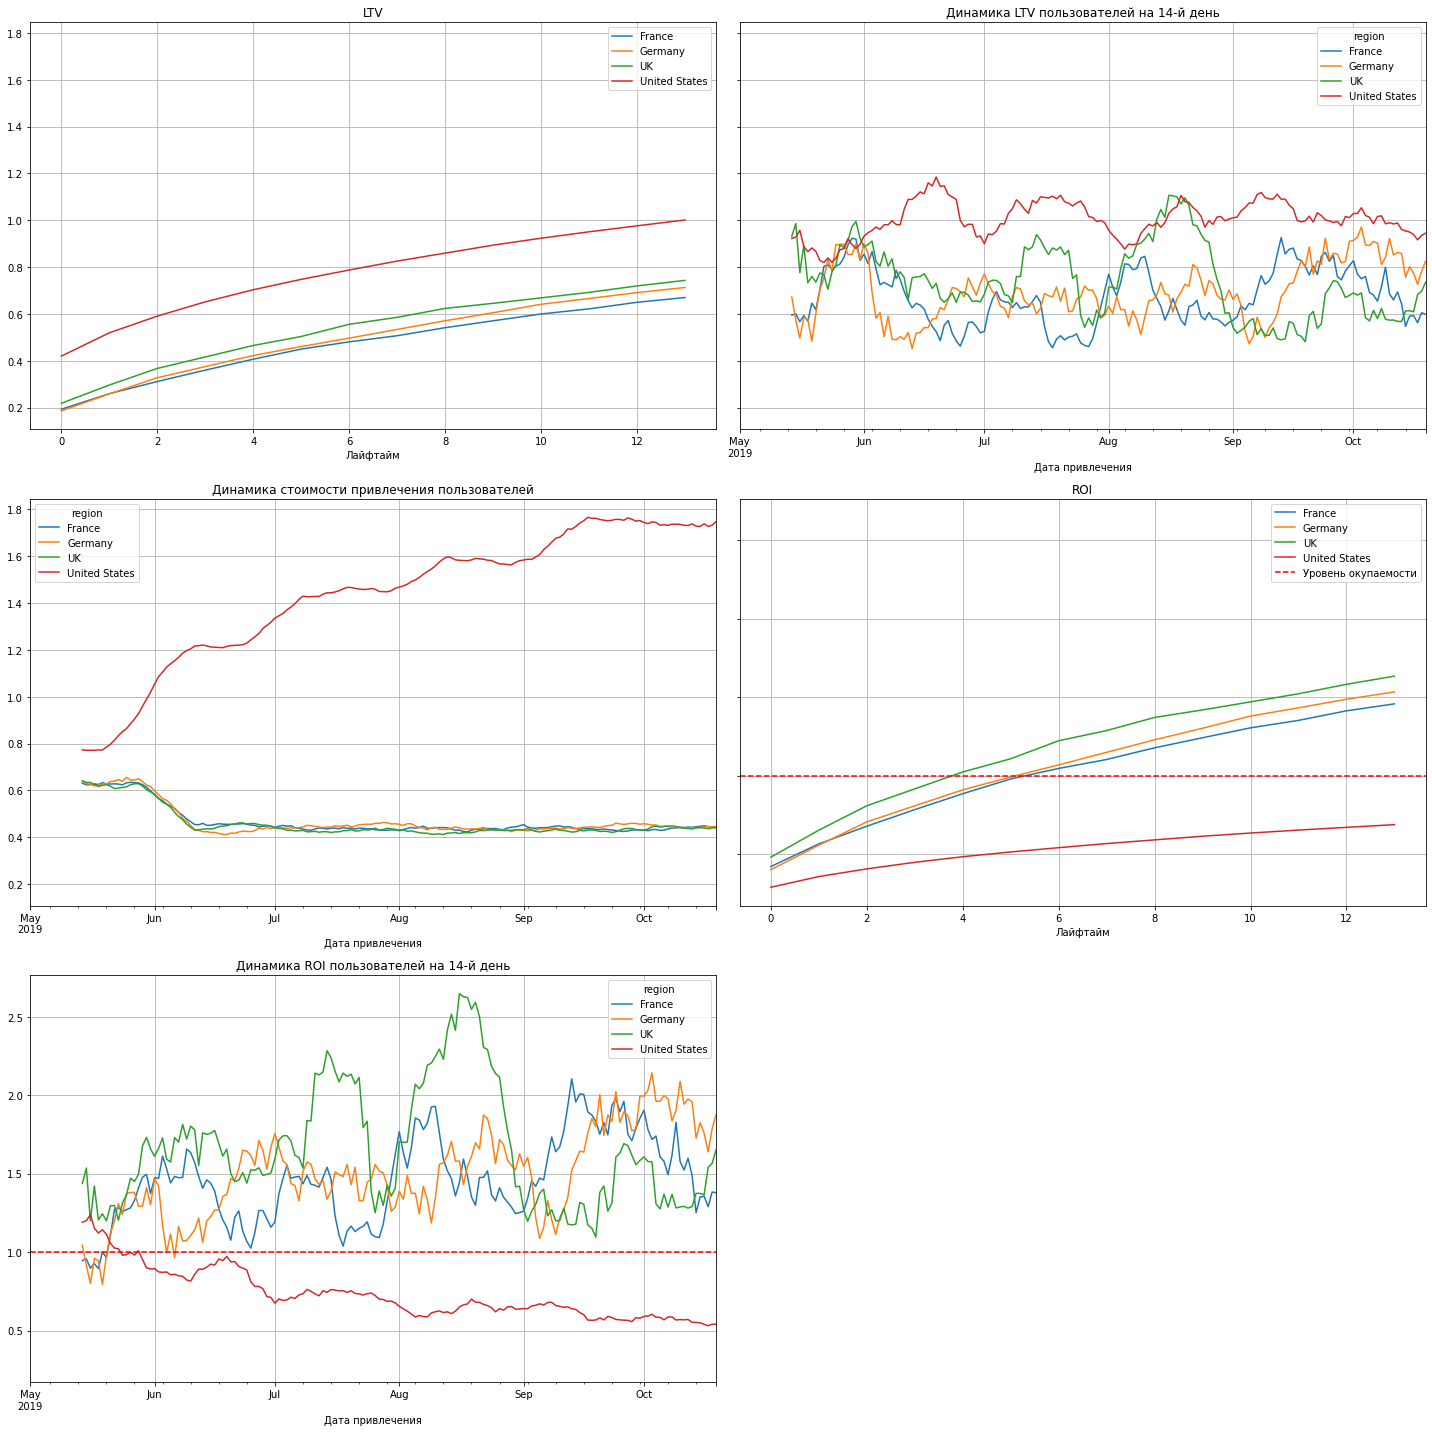

In [41]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Ну что же:

* несмотря на огромное количество привлеченных пользователей из США, толку от них для приложения нет, они быстро приходят и так же быстро уходят,

* затраты на рекламу в Европе остаются неизменными и окупаются, а вот в США растут и перестали окупаться с  июня (видимо, благодаря вливаниям рекламных денег в TipTop).

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Все верно. Нужно разбираться детальнее с рекламой в США, тем более, что это наш основной рынок. 

### Окупаемость с разбивкой по девайсам

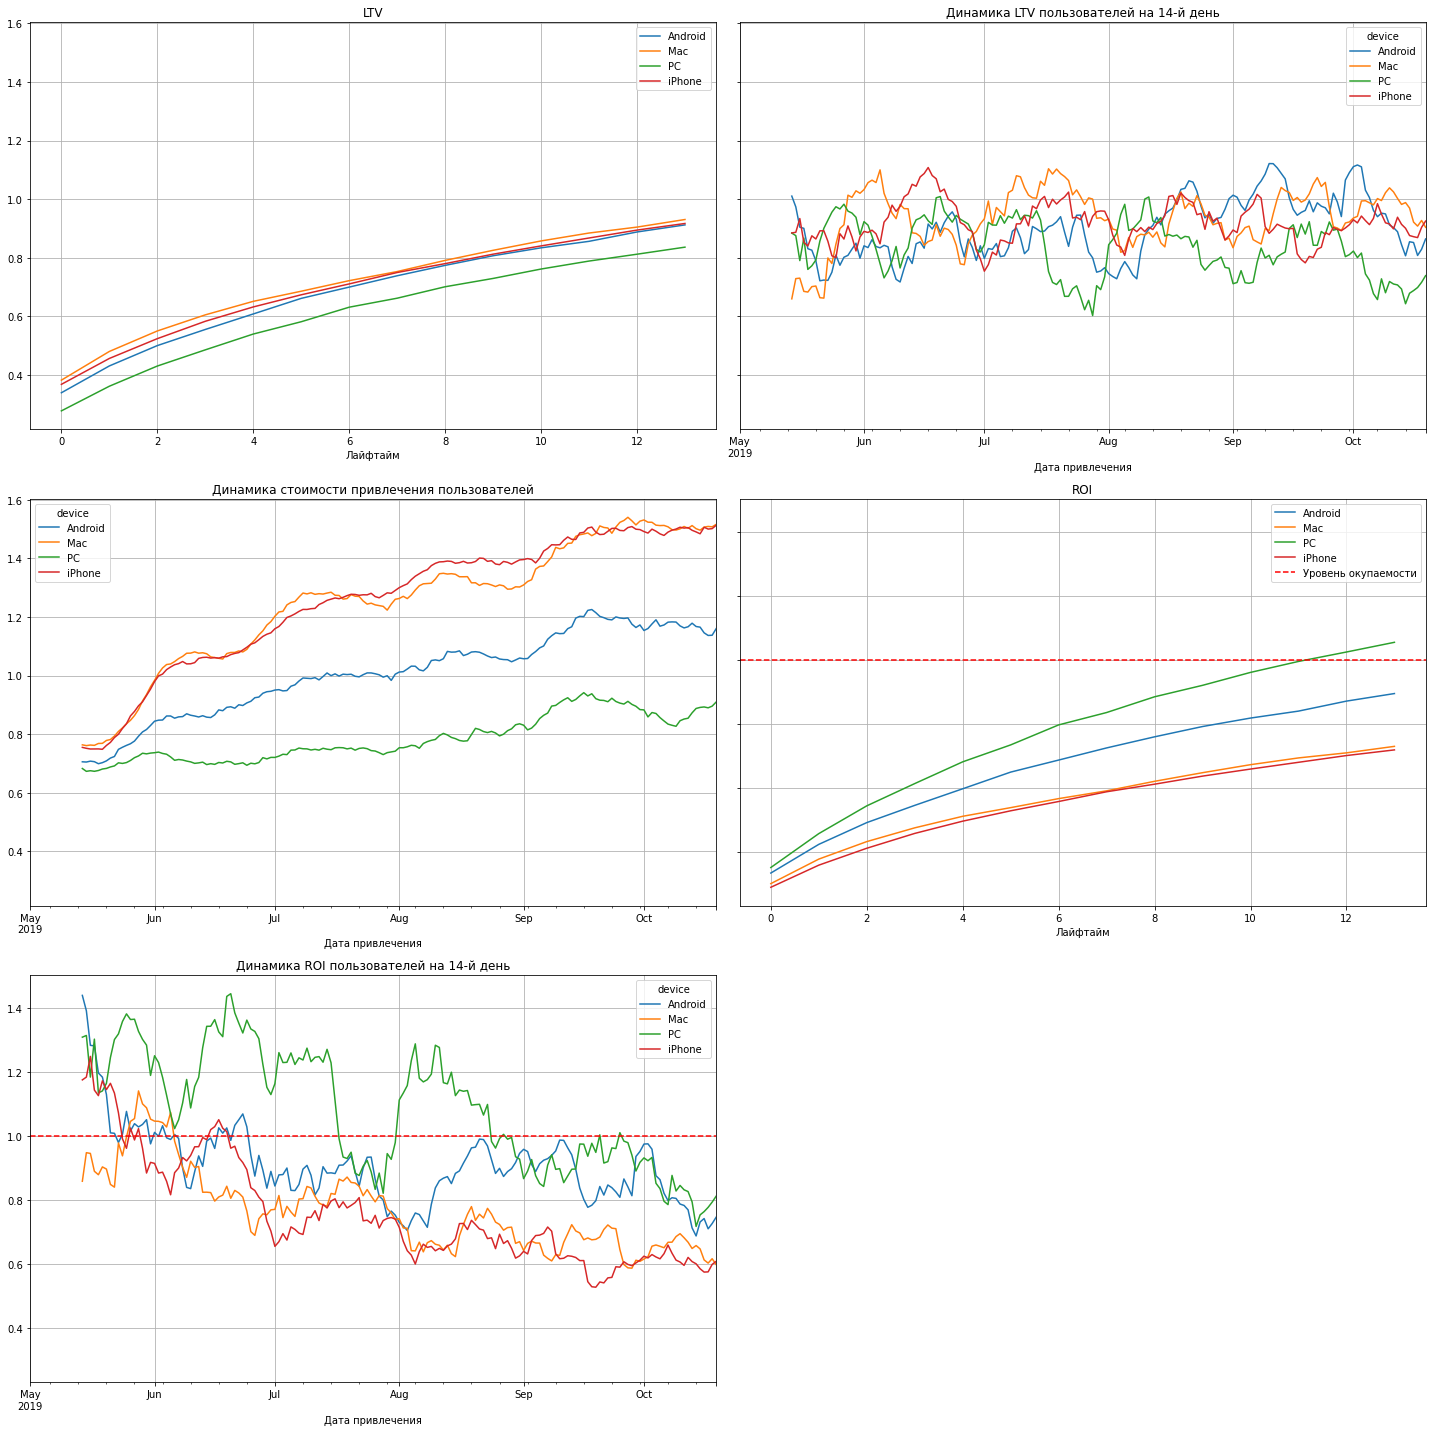

In [42]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
) 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
Отсутствует решение окупаемости по девайсам. Добавь, пожалуйста

<div class="alert alert-info"> <b>Комментарии студента:</b> LTV пользователей всех устроиств стабильно растёт. LTV держателей PC ниже, чем пользователей с других устройств, но, если смотреть на окупаемость, то как раз-таки окупается только эта категория пользователей. Со временем затраты на привлечение держателей iPhone и MAC значительно выше, чем привлечение пользователей с Android и PC. Динамика ROI говорит нам о том, что мае-июне месяце окупались практически все пользователи, а далее с большей или меньшей степенью ROI стал падать. Стремительнее всего падала окупаемость пользователей с iPhone. А вот пользователи с PC окупались самое большее время. В сентябре- октябре окупаемасть ушла в минус для пользователей всех устройств..</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

С окупаемостью проблемы по всем устройствам кроме PC. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию;
</div>

### Конверсия и удержание с разбивкой по устройствам, странам, рекламным каналам

Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам и узнаем, в чем причина проблем, изложенных выше: вдруг это последствия низкой конверсии или низкого удержания?

Подсчитаем и визуализируем конверсию с помощью функций `get_conversion` и `plot_conversion`.  
А для расчета и визуализации удержания нам помогут функции `get_retention` и `plot_retention`.

In [43]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [44]:
# функция для визуализации конверси

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [45]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [46]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Конверсия и удержание с разбивкой по устройствам

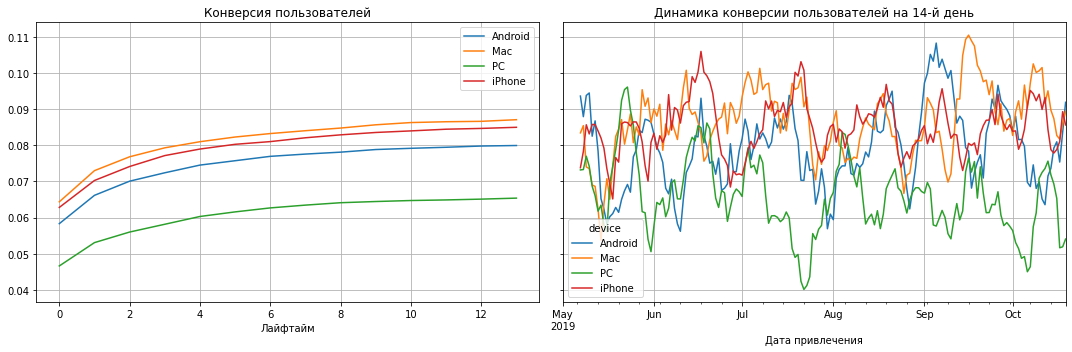

In [47]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)


Все устройства хорошо конверсируются, в лидерах устройства производста компании Apple, из общего потока немного выбиваются привлеченные пользователи, использующие PC: они привлекаются не так удачно.

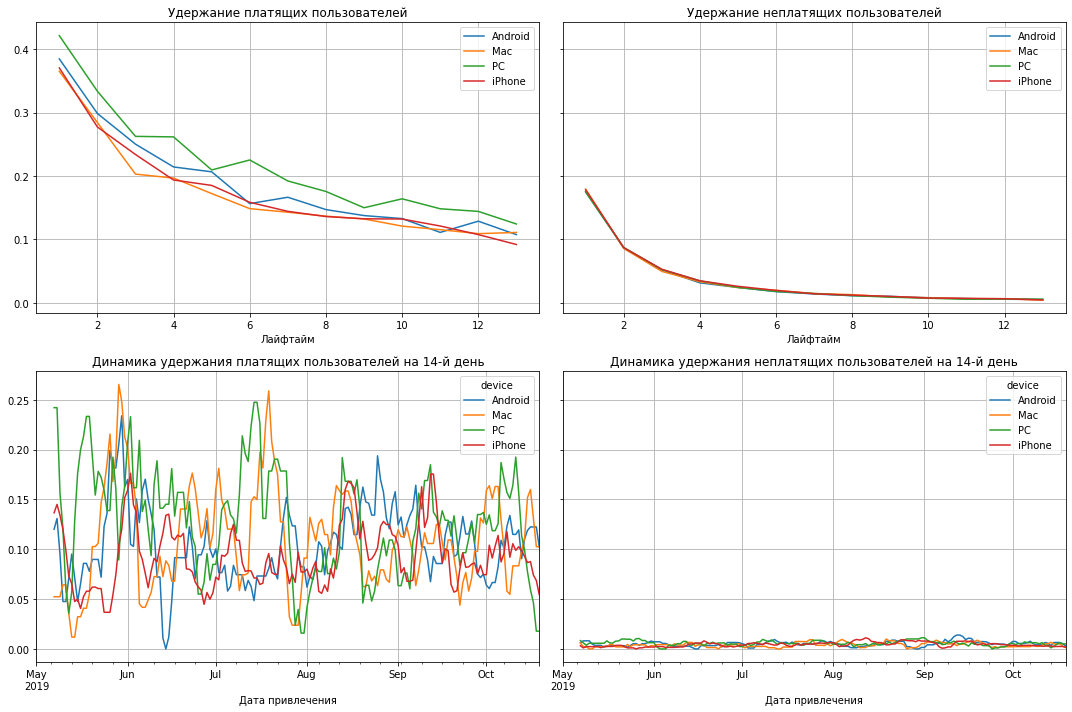

In [48]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)


Удержания пользователей в зависимости от устройств не очень сильно отличаются друг от друга, платящие пользователи PC удерживаются чуть лучше.

#### Конверсия и удержание с разбивкой по странам

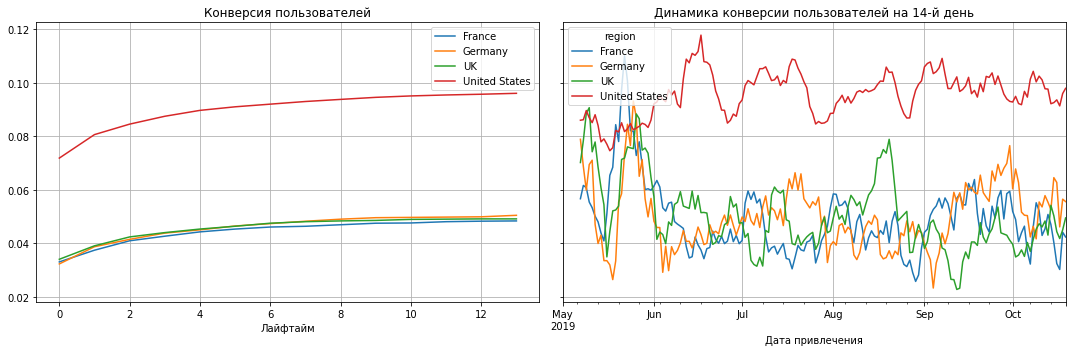

In [49]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия пользователей США почти в два раза выше конверсии пользователей других стран.

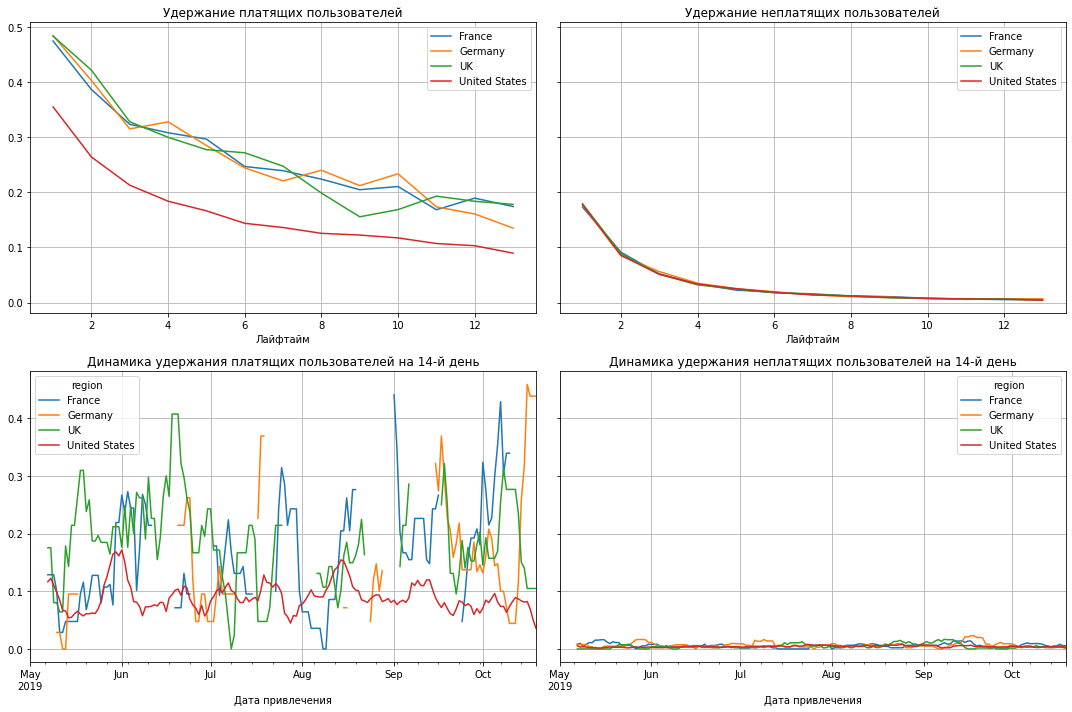

In [50]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)


А вот с удержанием платящих пользователей США  хуже всех.   
Неплатящие пользователи не показываю каких-то отличий (ни тип устройства, ни регион на их удержание не влияют).

#### Конверсия и удержание с разбивкой по каналам привлечения

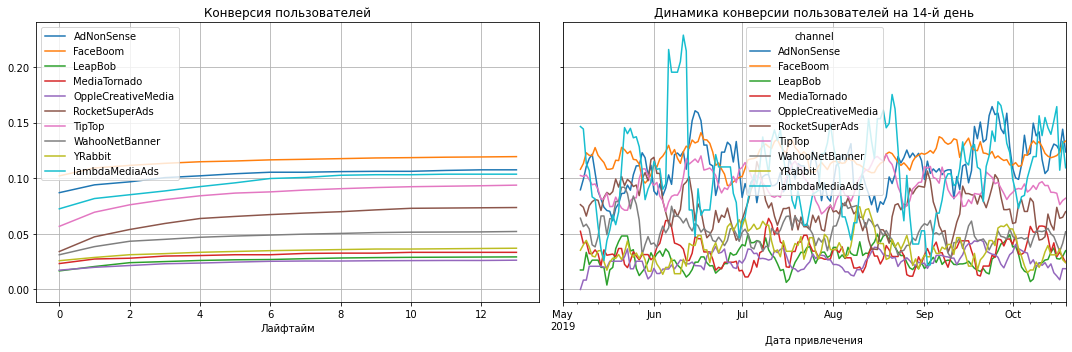

In [51]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Выше всего конверсия у пользователей, привлеченных посредством FaceBoom. Но вообще, динамики у всех пользователей в течение двухнедельного лайфтайма практически и нет.

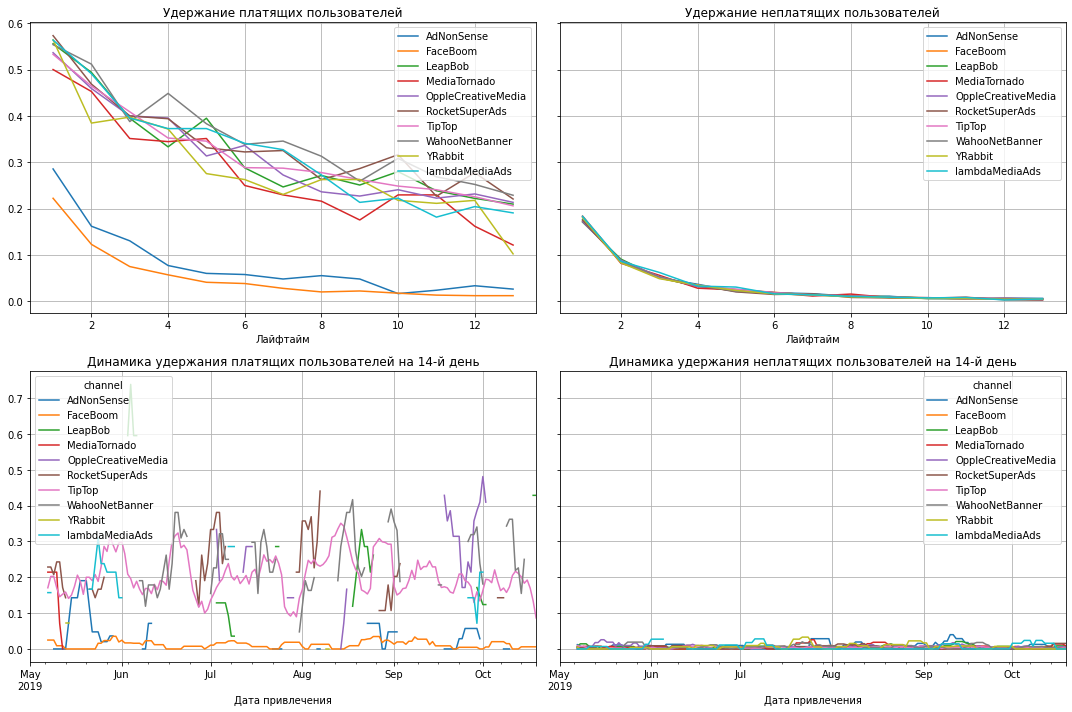

In [52]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Хуже всего  из платящих удерживаются пользователи из FaceBoom и AdNonSense.

Итак, в результате анализа окупаемости рекламы можно сделать следующие выводы:

* в общем и целом реклама не окупается;   
* это вызвано низкой окупаемостью рекламы в США, как основной страны присутствия;
* пользователи из США конверсируются больше, но есть проблемы с удержанием платящих пользователей;
* один из самых проблемных каналов -  FaceBoom (не окупается имея второе место по сумме затрат на рекламу, низкое удержание платящих пользователей); далее хотим отметить TipTop - неоправданно высокий рост САС, в следствие чего он через месяц перестал окупаться;      
* по устройствам в аутсайдерах конверсии пользователи PC, но при этом они неплохо удерживаются.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, анализ окупаемости корректен, согласен с интерпретацией результатов. Проблемные источники определены верно.

## Выводы и рекомендации

Общий вывод и рекомендации по результатам исследования

Компания-заказчик представлена на рынках Европы (Германия, Франция и Великобритания) и США. Несмотря на значительные вложения в рекламу, последние несколько месяцев компания несет убытки. Основная причина связана с неэффективной рекламной стратегией и низким удержанием платящих пользователей.

Мы проанализировали предоставленные данные, включающие:
	• лог сервера с данными о посещениях пользователей,
	• выгрузку покупок за период с 1 мая по 27 октября 2019 года,
	• рекламные расходы за указанный период.

Выявленные проблемы:
	
    1. Высокая стоимость привлечения пользователей через основные рекламные каналы:
	• FaceBoom, TipTop (США) и AdNonSense (Европа) имеют высокий CAC, который не окупается в двухнедельном горизонте.
	• Расходы на TipTop выросли почти втрое за полгода, но эффективность рекламы в этом канале снизилась.
	2. Проблемы с удержанием платящих пользователей:
	• Удержание пользователей, привлеченных через FaceBoom и AdNonSense, значительно ниже среднего.
	• Пользователи из США демонстрируют высокую конверсию, но быстро покидают приложение, что снижает ROI.
	3. Недостаточное внимание к пользователям ПК:
	• Владельцы ПК показывают лучшее удержание и единственные окупаются к концу второй недели, но их доля среди клиентов мала.
	4. Низкая окупаемость органических пользователей:
	• Органический трафик составляет значительную долю дохода, но работа с ним не оптимизирована.

Рекомендации для отдела маркетинга:
	
    1. США как приоритетный рынок:
	• Отключить FaceBoom и TipTop или значительно сократить их бюджет. Рассмотреть возможность перераспределения средств в пользу других каналов, таких как lambdaMediaAds и RocketSuperAds.
	• Анализировать рост CAC в TipTop. Если причину невозможно устранить, отказаться от этой площадки.
	
    2. Увеличение инвестиций в перспективные каналы:
	• lambdaMediaAds и RocketSuperAds показали низкий CAC, высокую LTV и достойное удержание пользователей. Увеличение расходов на эти каналы может улучшить ROI.
	
    3. Европейский рынок как стабилизатор:
	• Увеличить рекламный бюджет в Европе, где рынки показывают стабильное удержание и конверсию.
	
    4. Фокус на владельцах ПК:
	• Владельцы ПК показывают лучшее удержание и окупаемость. Следует увеличить внимание к этой аудитории через специализированные рекламные кампании.
	
    5. Работа с органическими пользователями:
	• Укрепить работу с органическим трафиком за счет программ лояльности, персонализированных предложений и улучшенного пользовательского опыта.
	
    6. Оптимизация удержания в США:
	• Провести анализ причин низкого удержания платящих пользователей из США и разработать меры для повышения их вовлеченности (например, скидки, бонусы или улучшение продукта).

Эти меры помогут компании улучшить рентабельность рекламной кампании, повысить удержание пользователей и восстановить прибыльность.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
        
Шикарный вывод, молодец, что в итоговом выводе сформулировал рекомендации для отдела маркетинга: про каналы, от которых стоит отказаться ты упомянул, также предложил альтернативный канал(RocketSuperAds), по которому показатели конверсии, удержания и ROI на приемлемом уровне. Как думаешь, а канал `Yrabbit` подойдет?

<div class="alert alert-info"> <b>Комментарии студента:</b> Выводы переработал. По Yrabbit .</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличная работа. Молодец!)
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:


1) Шаг 3, даты

2) Визуализировать динамику расходов по каналам, по месяцам и неделям (2 графика)

3) Окупаемость по девайсам

4) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__

    
В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊

---

От себя хочу порекомендовать тебе отличный материал про продуктовую аналитику Дмитрия Животворева. 
    
https://www.youtube.com/watch?v=Vy_rq-x9QEo
    